# Praktikum Visi Komputer
## Modul ke-7

## Deteksi dan tracking/lacak bagian dari tubuh 

Pada modul ini, kita akan belajar cara mendeteksi dan melacak bagian tubuh yang berbeda secara langsung dari video stream dengan menggunakan algoritma Viola Jones. Viola Jones merupakan pendekatan deteksi objek yang sangat cepat dengan kecepatan sebanyak 15 frame per detik. Kita akan mulai dengan membahas pipeline/saluran pendeteksi wajah dari dasar. Lalu menggunakan framework tersebut untuk mendeteksi dan melacak bagian tubuh lain seperti mata, telinga, mulut dan hidung.


### Viola Jones Detector

Pada tahun 2001, Paul Viola dan Michael Jones mempublikasikan metode deteksi objek yang sangat efektif. Metode tersebut menjadi sangat penting dalam perkembangan machine learning (pembelajaran mesin). Dalam [makalahnya](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), mereka menjelaskan teknik machine learning di mana boosted cascade dari classifier sederhana digunakan untuk classifier keseluruhan yang memiliki kinerja sangat baik. Dengan cara ini, kita dapat menghindari untuk membuat satu classifier kompleks yang bekerja dengan akurasi tinggi. Sebab membangun suatu single-step classifier yang robust memerlukan proses komputasi yang intensive. Selain itu juga, perlu banyak data training untuk membangun classifier. Sehingga model menjadi kompleks dan bisa saja performanya tidak sesuai dengan yang diharapkan.

Sebagai contoh, kita ingin mendeteksi objek kucing. Untuk menyelesaikan masalah ini, kita perlu membangun sistem machine learning yang bisa belajar bagaimana bentuk kucing. Sistem tersebut seharusnya dapat memberitahukan pada kita, apakah suatu citra mengandung objek kucing atau tidak. Untuk menyelesaikan masalah tersebut maka kita perlu melatih sistem dengan memasukkan banyak gambar kucing dan bukan kucing. Gambar kucing disebut sebagai citra positif dan gambar bukan kucing sebagai citra negatif.

Sebetulnya banyak cara melakukan pelatihan/training. Namun semua teknik tradisional ini memerlukan proses komputasi yang intensive sehingga menghasilkan model yang kompleks. Model yang kompleks tersebut akan susah diimplementasikan pada sistem real-time. Oleh karena itu, kita perlu membuat classifier yang sederhana. Namun yang ditakutkan, jika classifier sederhana, hasilnya menjadi tidak akurat. Pilihan antara kecepatan dan akurasi adalah hal yang biasa pada machine learning (pembelajaran mesin). Kita mengatasi masalah ini dengan membangun sekumpulan classifier sederhana lalu melakukan cascade terhadap classifier tersebut untuk membentuk classifier yang digabungkan dan robust. Untuk membuat semua classifier berjalan dengan baik, kita perlu kreativitas dalam melakukan langkah cascading. Inilah alasan mengapa metode Viola-Jones menjadi sangat efektif.

Detektor menggunakan algoritma Viola Jones mengandung beberapa langkah:
1. Menghitung Citra Integral
2. Menghitung fitur Haar (Haar like features)
3. Algoritma pembelajaran AdaBoost 
4. Cascade Filter


### Penggunaan Haar cascades untuk mendeteksi benda

Haar cascade ini sebetulnya cascade classifier berdasarkan fitur Haar. Fitur Haar merupakan fitur yang relevan untuk deteksi wajah. Fitur Haar diusulkan oleh Alfred Haar pada tahun 1909. Fitur Haar mirip seperti kernel konvolusi. Terdapat berbagai jenis fitur Haar namun fitur yang paling dominan adalah:
- 2 Rectangular Haar features
- 3 Rectangular Haar features
- 4 Rectangular Haar features

[![haar](https://i.im.ge/2022/10/15/2IUEUW.haar.md.png)](https://im.ge/i/2IUEUW)

Nilai dari `2 rectangular feature` merupakan perbedaan (difference) antara jumlah piksel dalam 2 kawasan rectangular. Kawasan ini memiliki bentuk dan ukuran yang sama di mana saling bersisian secara horizontal ataupun vertikal. `4 rectangular feature` menghitung perbedaan antara pasangan diagonal dari rectangle. Beberapa variasi dari kawasan ini yang berbeda ukuran akan digunakan dalam proses konvolusi terhadap citra untuk mendapatkan beberapa filter yang akan menjadi input bagi algoritma latih AdaBoost. Proses kalkulasi fitur ini menggunakan teknik standar memerlukan waktu komputasi yang sangat lama. Untuk mengurangi waktu ini, maka pendekatan baru yang menggunakan Citra Integral diusulkan oleh Viola Jones.


### Citra integral

Komputasi menggunakan fitur Haar memerlukan proses komputasi penjumlahan dari banyak region persegi yang berbeda ukuran dan lokasi di dalam citra. Proses tersebut dapat menghasilkan 200-ribuan fitur yang perlu dikalkulasi dan jumlah tersebut adalah sangat besar. Apabila kita ingin membangun fitur set yang efektif, maka kita perlu menghitung penjumlahan pada bermacam-macam skala. Proses ini berjalan secara repetitive dan sangat lambat dengan kompleksitas waktu O(n * n). Sehingga kita tidak mungkin melakukan banyak sekali perulangan untuk menghitung penjumlahan ini. Oleh karena itu, kita gunakan pendekatan Citra Integral (integral image) untuk mendapatkan kompleksitas waktu O(1).

[![T6HahX.jpg](https://i.im.ge/2021/09/16/T6HahX.jpg)](https://im.ge/i/T6HahX)

Pada citra integral, nilai dari setiap titik adalah jumlah semua piksel di atasnya lalu ke kiri dan termasuk juga piksel dari titik tersebut. Untuk membuat citra integral, kita mentransformasikan citra input ke tabel jumlah kawasan (*summed-area table*) di mana nilai pada setiap titik (x, y) pada tabel tersebut merupakan jumlah semua piksel di atasnya plus yang sebelah kirinya (inklusif-termasuk titiknya). Nilai I(x, y) merupakan nilai piksel citra integral pada posisi (x, y), sedangkan i(x, y) merupakan intensitas pada citra aslinya. Proses ini berjalan secara rekursif. Agar lebih jelas, silakan lihat gambar berikut.

[![integral3](https://i.im.ge/2022/10/15/2IWpR1.integral3.png)](https://im.ge/i/2IWpR1)

Seperti yang terlihat pada gambar di atas, ada tambahan satu baris dan kolom bernilai 0 untuk memudahkan proses rekursif. Proses komputasi untuk membuat citra integral dimulai dari piksel pertama dengan intensitas '1': nilai pada citra integral tetap '1' (1+0+0). Kemudian piksel '3': nilai citra integral menjadi '4' (3+1+0+0). Kemudian piksel '7': menjadi '8' (7+1+0). Lalu piksel '9': menjadi '20' (9+3+1+7). Agar lebih paham, anda dapat melihat contoh gambar lainnya di bawah.

[![integral2](https://i.im.ge/2022/10/15/2IhceD.integral2.md.png)](https://im.ge/i/2IhceD)

Jadi apa kegunaan citra integral? Ternyata citra integral memiliki sifat unik, misal kita ingin menghitung jumlah intensitas suatu window pada citra input, ternyata jumlah tersebut sama saja dengan kombinasi linear dari nilai pada sudut citra integral, seperti rumus berikut:

[![integral4](https://i.im.ge/2022/10/16/2LlNUh.integral4.md.png)](https://im.ge/i/2LlNUh)

Dengan menggunakan citra integral, kita menghemat waktu saat menghitung jumlah dari semua piksel pada suatu persegi. Sebab kita hanya perlu melakukan kalkulasi pada 4 sisi dari persegi. Lihat contoh di bawah.

[![T6HDBh.jpg](https://i.im.ge/2021/09/16/T6HDBh.jpg)](https://im.ge/i/T6HDBh)

Ketika kita menambahkan semua piksel pada kotak biru, hasilnya adalah 8. Proses di sini melibatkan 6 unsur yang terlibat dalam kalkulasi. Berikutnya kita coba hitung dengan menggunakan citra integral. Kita hanya perlu nilai dari setiap sudut pada persegi. Lalu tambah sudut yang berwarna hijau kemudian dikurangkan dengan sudut yang berwarna merah. 

21+1 - 11 -3 =8

Di sini kita dapatkan nilai yang sama dengan hanya melibatkan 4 unsur dalam proses kalkulasi. Berapapun jumlah piksel yang ingin dikalkulasi, dengan cara ini kita hanya perlu menghitung 4 unsur tersebut.


### Menghitung fitur Haar

Kita mendapatkan waktu konstan untuk menghitung fitur Haar dengan menggunakan citra integral. 
- Edge Features atau 2 Rectangular Features hanya memerlukan 6 memory lookups
- Line Features atau 3 Rectangular Features hanya memerlukan 8 memory lookups.
- Diagonal Features atau 4 Rectangular Features hanya memerlukan 9 memory lookups.

Rumus linear untuk menghitung fitur Haar
- 2 Rectangle = A-2B+C-D+2E-F
- 3 Rectangle = A-B-2C+2D+2E-2F-G+H
- 4 Rectangle = A-2B+C-2D+4E-2F+H-2I+J

[![integral5](https://i.im.ge/2022/10/16/2LlpWG.integral5.md.png)](https://im.ge/i/2LlpWG)


### Boosting dan AdaBoost Algorithm

Secara umum **boosting** merujuk pada metode *Ensemble* yang mengkombinasikan beberapa *weak learner* ke dalam satu *strong learner*. Ide umum pada metode boosting sebenarnya untuk melakukan training pada predictor secara sekuensial, di mana masing-masing training akan memperbaiki training sebelumnya. Salah satu metode boosting adalah AdaBoost. **AdaBoost** juga dikenal sebagai Adaptive Boosting, yang merupakan teknik Boosting populer.

Untuk memilih fitur yang spesifik yang akan digunakan dan untuk mengatur nilai ambangnya (threshold), Viola dan Jones menggunakan sebuah metode machine learning yang disebut AdaBoost. AdaBoost menggabungkan banyak classifier lemah untuk membuat sebuah classifier kuat. Lemah disini berarti urutan filter pada classifier hanya mendapatkan jawaban benar lebih sedikit. Jika keseluruhan classifier lemah digabungkan maka akan menjadi classifier yang lebih kuat. AdaBoost memilih sejumlah classifier lemah untuk disatukan dan menambahkan bobot pada setiap classifier, sehingga akan menjadi classifier yang kuat. Viola-Jones menggabungkan beberapa AdaBoost classifier sebagai rangkaian filter
yang cukup efisien untuk menggolongkan daerah image. Masing-masing filter adalah satu AdaBoost classifier terpisah yang terdiri classifier lemah atau satu filter fitur. 


### Cascade filter
 
Karakteristik dari algoritma Viola-Jones adalah adanya klasifikasi bertingkat (*cascading filter*). Klasifikasi pada algoritma ini terdiri dari tiga tingkatan dimana tiap tingkatan mengeluarkan subcitra yang diyakini bukan wajah. Hal ini dilakukan karena lebih mudah untuk menilai subcitra tersebut bukan wajah ketimbang menilai apakah subcitra tersebut berisi wajah.

[![cascadefilter](https://i.im.ge/2022/10/16/2LusDJ.cascadefilter.png)](https://im.ge/i/2LusDJ)

Gambar di atas menunjukan klasifikasi tingkat pertama, tiap sub-citra akan diklasifikasi menggunakan satu fitur. Klasifikasi ini kira-kira akan menyisakan 50% sub-citra untuk diklasifikasi ditahap kedua. Jumlah sub-citra yang lolos klasifikasi akan berkurang hingga mencapai jumlah sekitar 2%. 

Struktur cascade berguna untuk menolak sub-window negatif sebanyak mungkin dan secepat mungkin di level yang memungkinkan. Sementara contoh positif akan memicu evaluasi setiap classifier pada cascade.
Pengklasifikasian selanjutnya dilatih menggunakan contoh-contoh yang melewati semua tahap sebelumnya. 

### Deteksi dan lacak/tracking wajah

Di sini kita mencoba untuk mendeteksi wajah. Apabila kita ingin membangun machine learning, maka kita perlu melakukan ekstraksi fitur dari semua citra yang ada dalam data. Berdasarkan fitur tersebut, sistem algoritma machine learning akan belajar bagaimana bentuk wajah. Kita akan menggunakan fitur Haar untuk membangun vektor dari fitur. Fitur Haar berupa penjumlahan dan pengurangan sederhana dari tambalan-tambalan (patches) pada citra. Proses ini dilakukan pada berbagai ukuran citra untuk memastikan sistem yang dibangun tidak tergantung pada skala.

[![haar1](https://i.im.ge/2022/10/16/2LujM8.haar1.png)](https://im.ge/i/2LujM8)

Fitur yang sudah diekstrak akan dikirim ke classifier yang saling cascade. Kita hanya perlu mengekstrak sub-region persegi yang berbeda, lalu membuangnya apabila tidak mengandung wajah di dalamnya. Dengan cara ini, kita sampai pada kesimpulan akhir lebih cepat dengan memastikan apakah sub-region persegi mengandung wajah atau tidak.


OpenCV telah menyediakan framework deteksi wajah. Kita hanya perlu membuka file cascade dan menggunakannya untuk mendeteksi wajah pada citra.

In [18]:
#Deteksi wajah pada gambar
import cv2

#download folder cascade di https://drive.google.com/file/d/1AcMPiaExIdzCmBc2E24exnPtwIB3_ir6/view?usp=sharing
face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_default.xml')
#atau
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

#download gambar di https://i.im.ge/2022/10/16/2Lro1F.people1.jpg
img = cv2.imread('gambar/people1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 5)

for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.namedWindow('Face Detected!')
cv2.imshow('Face Detected!', img)
cv2.imwrite('./gambar/face_detected.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Apabila anda mencoba kode program di atas, anda dapat melihat semua wajah berhasil terdeteksi karena citra input memang hanya terdiri dari wajah sehingga memudahkan classifier dalam proses deteksi wajah.
Namun apabila citra input lebih kompleks yang terdiri dari banyak anggota tubuh yang lain, proses ini bisa saja menimbulkan hasil False Positive. Coba kode program di bawah ini.

In [19]:
#Deteksi wajah pada gambar
import cv2

face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_default.xml')

#download gambar di https://i.im.ge/2022/10/16/2LuE5p.people2.jpg
img = cv2.imread('./gambar/people2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 5)

for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.namedWindow('Face Detected!')
cv2.imshow('Face Detected!', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
#Latihan 1
#Coba kode program di atas dengan mengubah citra menjadi 
#https://i.im.ge/2022/10/16/2Lux8P.people.jpg

import cv2 

# deteksi wajah pada gambar dari citra dengan menggunakan haar cascade pada bagian depan muka
face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_alt.xml')

img_latihan1 = cv2.imread('gambar/people.jpg')
gray = cv2.cvtColor(img_latihan1, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 5)

# Membuat perulangan sebanyak muka yang ada di citra
for (x,y,w,h) in faces:
    img_latihan1 = cv2.rectangle(img_latihan1, (x,y), (x + w, y + h), (255,0,0),2)

cv2.namedWindow("Deteksi wajah")
cv2.imshow("Deteksi wajah", img_latihan1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [21]:
#Deteksi wajah dari live camera
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_alt.xml')
#atau
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(0)
scaling_factor = 0.5

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor,
    interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
        
    cv2.imshow('Face Detector', frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

### Deteksi mata

Sesudah kita memahami cara mendeteksi wajab, kita dapat mengeneralisasi konsep deteksi bagian tubuh lainnya. Framework Viola-Jones dapat diaplikasikan pada objek apapun. Akurasi dan robustness akan sangat tergantung pada keunikan dari objek. Contohnya wajah manusia memiliki karakteristik unik sehingga mudah untuk melatih sistem menjadi robust. Namun jika objek berupa handuk, maka objek ini terlalu umum dan susah menemukan karakterisktik uniknya. 

Berikut ini akan kita lihat proses deteksi mata.

In [22]:
#Deteksi mata
#Agar proses deteksi mata menjadi lebih cepat maka pertama sekali kita deteksi wajah
#baru kemudian dari region wajah dilakukan deteksi mata
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('cascades/haarcascade_eye.xml')
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')
if eye_cascade.empty():
    raise IOError('Unable to load the eye cascade classifier xml file')
    
cap = cv2.VideoCapture(0)
ds_factor = 0.5

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (x_eye,y_eye,w_eye,h_eye) in eyes:
            center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
            radius = int(0.3 * (w_eye + h_eye))
            color = (0, 255, 0)
            thickness = 3
            cv2.circle(roi_color, center, radius, color, thickness)
            
    cv2.imshow('Eye Detector', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [23]:
#Deteksi senyum
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')


def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
    return frame


video_capture = cv2.VideoCapture(0)
while video_capture.isOpened():
# Captures video_capture frame by frame
    _, frame = video_capture.read()
    
    # To capture image in monochrome
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # calls the detect() function
    canvas = detect(gray, frame)

    # Displays the result on camera feed
    cv2.imshow('Video', canvas)

    # The control breaks once q key is pressed
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

# Release the capture once all the processing is done.
video_capture.release()
cv2.destroyAllWindows()


Sebenarnya kita dapat mendapatkan akurasi lebih tinggi dan lebih robust dengan menggunakan deep learning untuk melakukan deteksi wajah. Namun Haar cascade dari OpenCV masih sangat berguna sebab:
- Sangat ringan 
- Ukuran model Haar cascade sangat kecil (930 KB)
- Sangat cepat, bahkan untuk perangkat yang memiliki kendala kapasitas (*resource-constrained*)

Memang masih terdapat masalah pada Haar cascade, sebab rentan terhadap deteksi False-Positive. Akurasi Haar cascade juga lebih rendah dibanding HOG + Linear SVM, SSD, YOLO. Namun fitur Haar cascade ini masih sangat berguna dan praktis, terutama pada perangkat yang memiliki kendala kapasitas (*resource-constrained*).


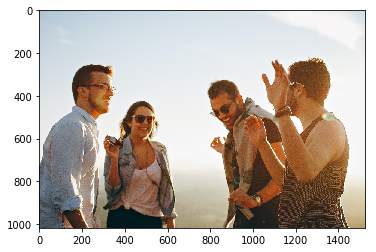

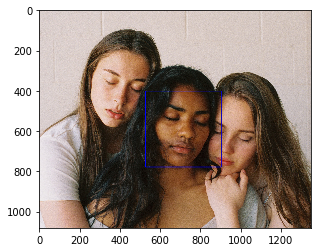

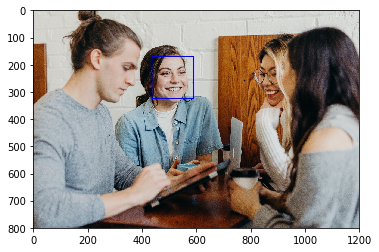

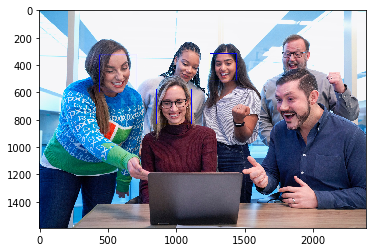

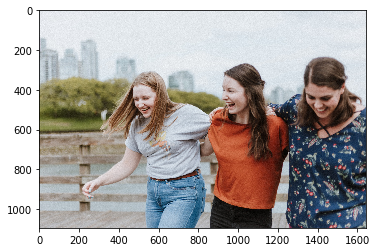

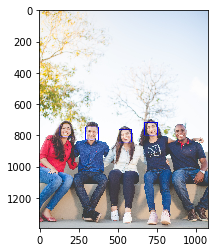

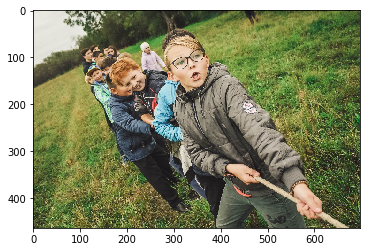

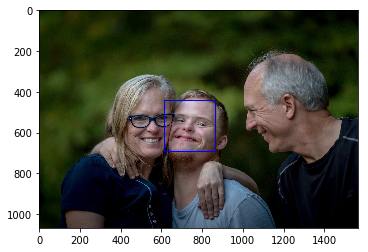

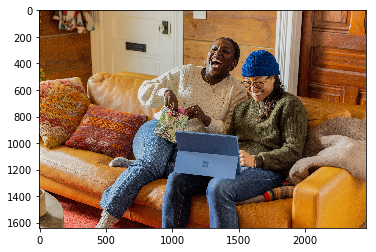

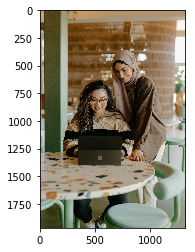

In [24]:
#Latihan 2
#Kumpulkan 10 gambar yang mengandung ramai orang (>2 orang), bisa gambar foto anda dan keluarga
#bisa juga foto anda dan saudara, bisa juga foto anda dan teman-teman, bebas saja
#Kemudian lakukan deteksi wajah dan tampilkan gambar hasil deteksi dengan matplotlib
#lalu hitung probabilitas setiap wajah pada suatu gambar yang berhasil terdeteksi (secara manual)
#Contoh pada gambar 1, ada 5 orang, apabila semua wajah berhasil terdeteksi semuanya maka
#probabilitas adalah 1
#Contoh pada gambar 2, ada 6 orang, apabila 4 wajah berhasil terdeteksi maka probabilitas
#adalah 4/6 atau 2/3
#Hitungan probabilitas tersebut juga ditampilkan/dicetak

#Latihan 1
#Coba kode program di atas dengan mengubah citra menjadi 
#https://i.im.ge/2022/10/16/2Lux8P.people.jpg

import cv2 
import os # Bertujuan untuk membuat iterasi pada folder gambar_prak 7

# deteksi wajah pada gambar dari citra dengan menggunakan haar cascade pada bagian depan muka
face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_alt.xml')

directory = 'gambar_prak7' # lokasi folder gambar_prak 7


# img_tes = cv2.imread('gambar_prak7/anna-samoylova-w55SpMmoPgE-unsplash.jpg') # membaca gambar
# gray = cv2.cvtColor(img_tes, cv2.COLOR_BGR2GRAY) # mengubah citra menjadi grayscale
# faces = face_cascade.detectMultiScale(gray, 1.3, 5) # deteksi wajah pada citra grayscale

# for (x,y,w,h) in faces: # membuat kotak pada wajah yang terdeteksi
#     cv2.rectangle(img_tes,(x,y),(x+w,y+h),(255,0,0),2)


# cv2.imshow('img',img_tes) # menampilkan gambar
# cv2.waitKey(0) # menunggu tombol ditekan
# cv2.destroyAllWindows() # menutup semua jendela

# Membuat perulangan untuk setiap file yang ada di folder gambar_prak7
for filename in os.listdir(directory):
    # membaca citra dalam folder gambar_prak 7
    img = cv2.imread(os.path.join(directory,filename))
    # Resize citra agar lebih kecil
    img = cv2.resize(img, (0,0), fx=0.3, fy=0.3)
    # mengubah citra menjadi grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # deteksi wajah pada citra
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # menampilkan kotak pada wajah yang terdeteksi
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # menampilkan hasil deteksi wajah
    cv2.imshow('DETEKSI WAJAH',img)
    # menunggu tombol apapun ditekan
    cv2.waitKey(0)
    # Menulis hasil deteksi wajah pada folder hasil_deteksi
    cv2.imwrite('hasil_deteksi/'+filename,img)
    # menutup semua jendela
    cv2.destroyAllWindows()


# MEnampilkan gambar hasil deteksi wajah
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for filename in os.listdir('hasil_deteksi'):
    img = mpimg.imread('hasil_deteksi/'+filename)
    imgplot = plt.imshow(img)
    plt.show()





# Menghitung Proababilitas

<p> Berikut ini adalah probabilitas jika menggunakan haar cascade dari setiap gambar

<ul>

<li>  Gambar 1: 0 / 4 = 0 %</li>
<li> Gambar 2: 1 / 3 = 33.33 % </li>
<li> Gambar 3: 1 / 4 = 25 % </li>
<li>Gambar 4: 3 / 6 = 50 %</li>
<li>
Gambar 5: 0 / 3 = 0 %</li>
<li>Gambar 6: 4 / 5 = 80 %</li>
<li>Gambar 7: 0 / 10 = 0 %</li>
<li>Gambar 8: 1 / 3 = 33.33 %</li>
<li>Gambar 9: 0 / 2 = 0 %</li>
<li>Gambar 10: 1/ 2 = 50 %</li>





</ul>
